# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:

* year: 2016 para todos los puntos de datos
* month: número para el mes del año
* day: número del día del año
* week: día de la semana como cadena de carácteres
* temp_2: temperatura máxima 2 días antes
* temp_1: temperatura máxima 1 día antes
* average: temperatura máxima media histórica
* actual: temperatura máxima medida
* friend: la predicción de su amigo, un número aleatorio entre 20 por debajo de la media y 20 por encima de la media

### 1. Importa el csv "temps.csv"

In [3]:
import pandas as pd
data=pd.read_csv("data/temps.csv")

### 2. Lidia con las variables categóricas del dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [14]:
data["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [32]:
data = pd.get_dummies(data, prefix=['week'], drop_first=True)
data

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,0,0,0,0,0,0


### 3. Divide en train y test

In [35]:
X=data.drop(columns=["friend"]).copy()
y=data["friend"]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)


### 4. Entrena el modelo


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.97341468, -0.33980884, -1.08236637, -1.70037951, -2.02064159,
       -1.30069457, -0.97794174, -0.65544457, -0.45852713, -1.36331637])

In [39]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [42]:
perdictions=regressor.predict(X_test)

In [43]:
from sklearn import metrics

mae=metrics.mean_absolute_error(y_test, perdictions)
mape=metrics.mean_absolute_percentage_error(y_test, perdictions)
mse=metrics.mean_squared_error(y_test, perdictions)

print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

MAE: 13.761904761904763
MAPE: 0.24471268912598737
MSE: 266.6190476190476


### 6. Representa el árbol de decision

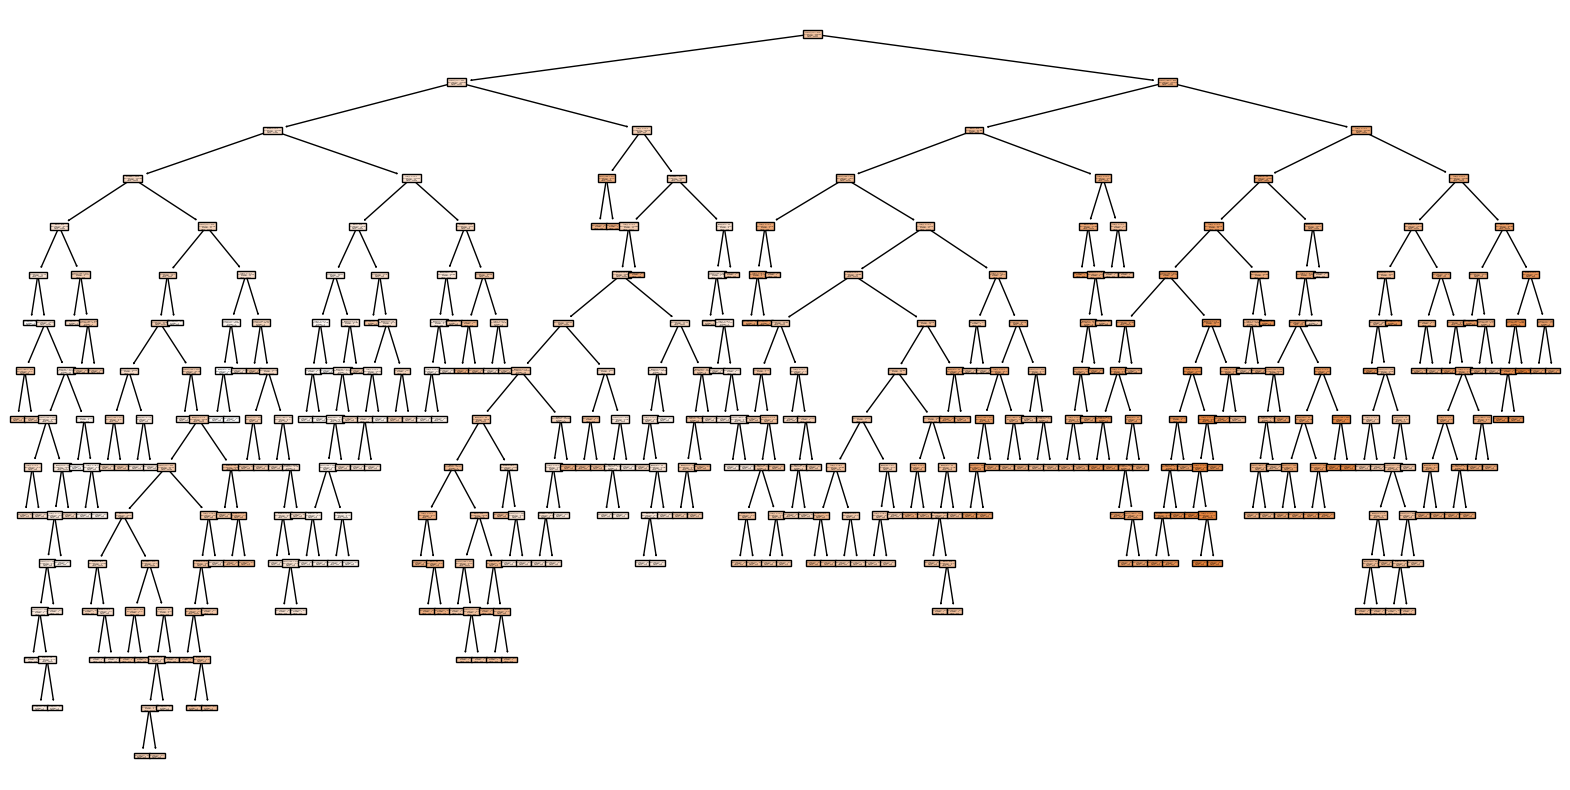

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_model = regressor


plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()



### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [48]:
regressor1 = DecisionTreeRegressor(random_state=0, max_depth=3)
regressor1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

### 8. Vuelve a evaluar tu modelo

In [50]:
predictions1=regressor1.predict(X_test)

mae=metrics.mean_absolute_error(y_test, predictions1)
mape=metrics.mean_absolute_percentage_error(y_test, predictions1)
mse=metrics.mean_squared_error(y_test, predictions1)

print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

MAE: 10.54368583624482
MAPE: 0.18488133606616328
MSE: 148.2398760962498


### 9. Vuelve a representar su árbol

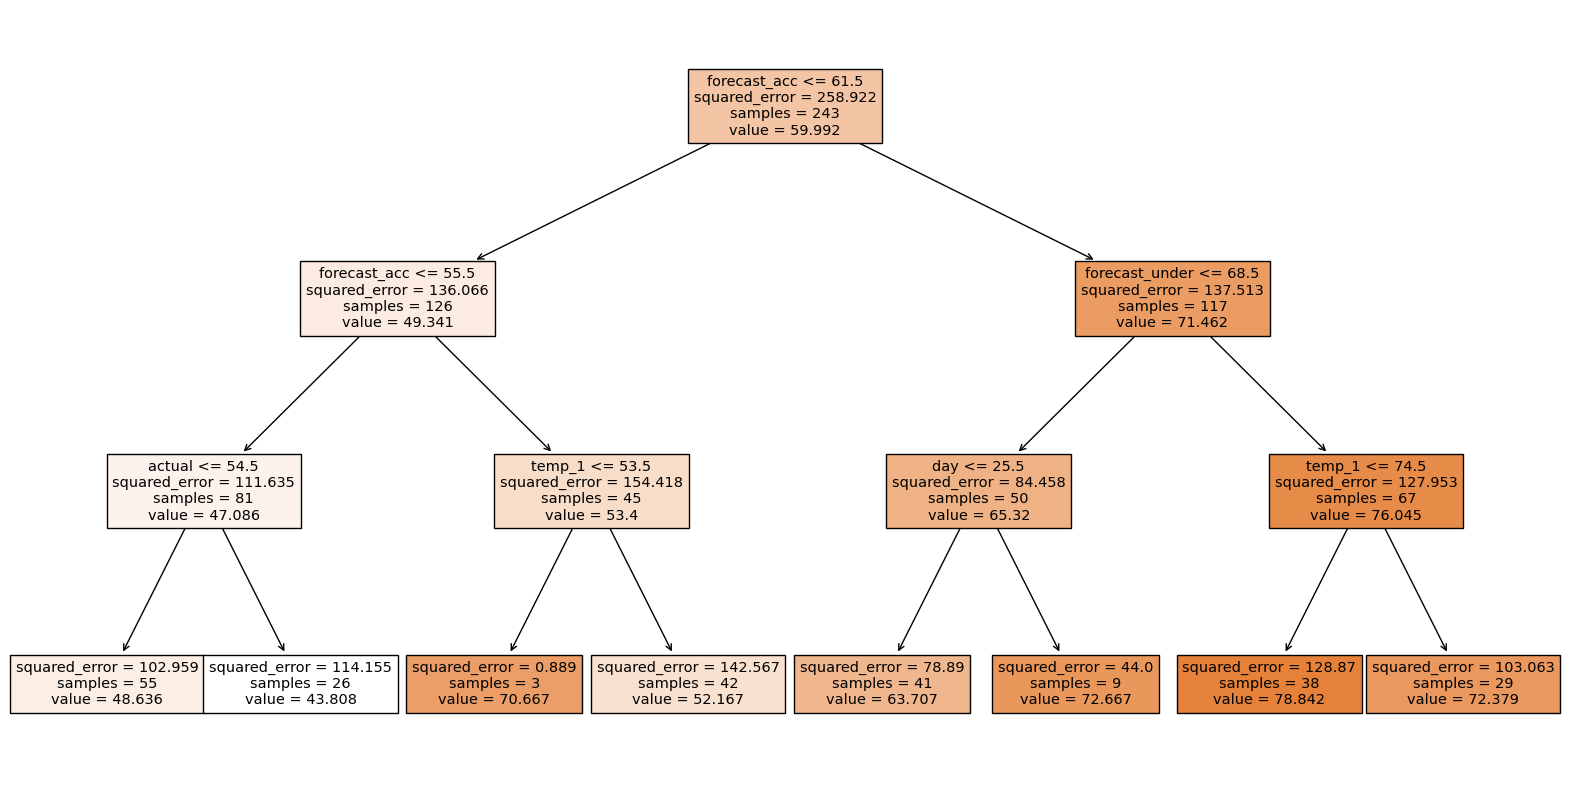

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_model = regressor1


plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

### 10. Utiliza un grid search con cross validation.

### 11. Obten el `feature_importances` de cada variable en el último modelo

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.